In [ ]:
# Import necessary libraries for data analysis and visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Set figure size for better visualization
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [ ]:
# Load Netflix dataset and display first few rows
df = pd.read_csv('../data/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
# Check the dimensions of the dataset (rows, columns)
df.shape

(8807, 12)

In [ ]:
# Display all column names in the dataset
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Display data types and non-null counts for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
# Count missing values in each column
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
# Handling missing values in key columns
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)

# Convert date_added to datetime and extract year for analysis
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year

In [ ]:
# Verify missing values after cleaning
df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      98
release_year     0
rating           4
duration         3
listed_in        0
description      0
year_added      98
dtype: int64

In [ ]:
# Display cleaned dataset
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0


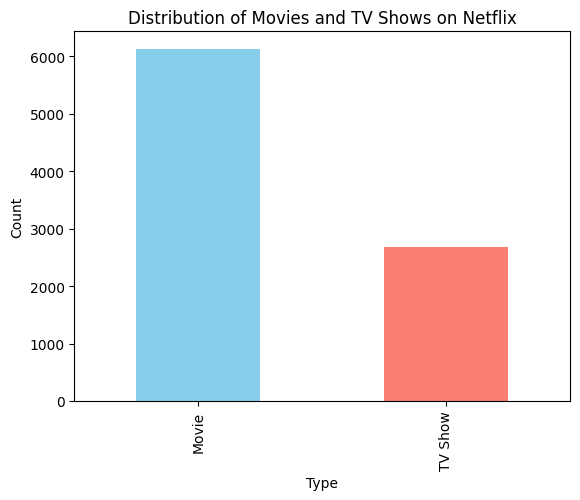

In [ ]:
# Visualization 1: Distribution of Movies vs TV Shows
type_counts = df['type'].value_counts()
type_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Movies and TV Shows on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

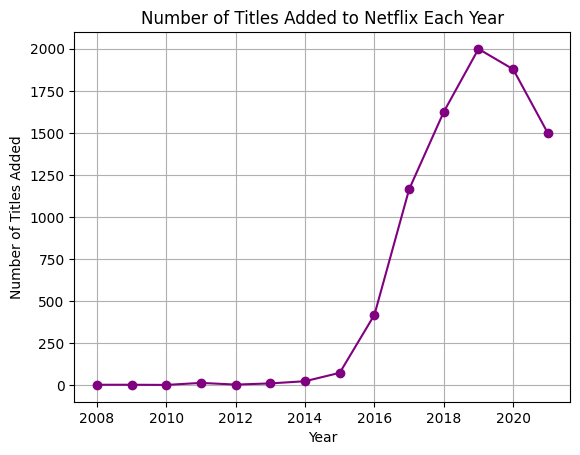

In [ ]:
# Visualization 2: Trend of titles added to Netflix over years
yearly_additions = df['year_added'].value_counts().sort_index()
yearly_additions.plot(kind='line', marker='o', color='purple')
plt.title('Number of Titles Added to Netflix Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.grid()
plt.show()

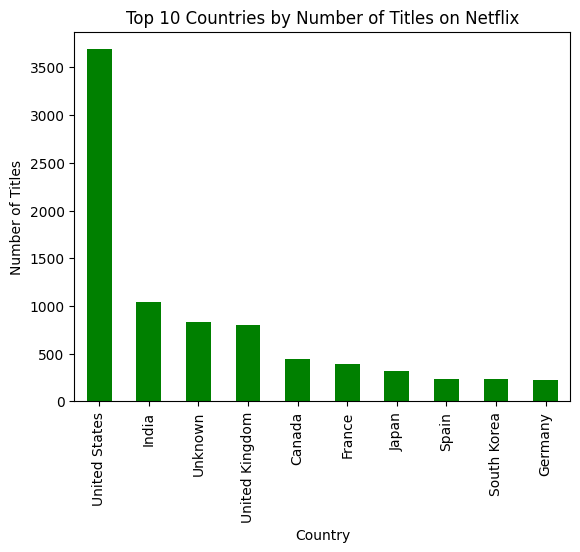

In [ ]:
# Visualization 3: Top 10 countries by number of titles
country_counts = df['country'].str.split(', ').explode().value_counts().head(10)
country_counts.plot(kind='bar', color='green')
plt.title('Top 10 Countries by Number of Titles on Netflix')
plt.xlabel('Country')   
plt.ylabel('Number of Titles')
plt.show()

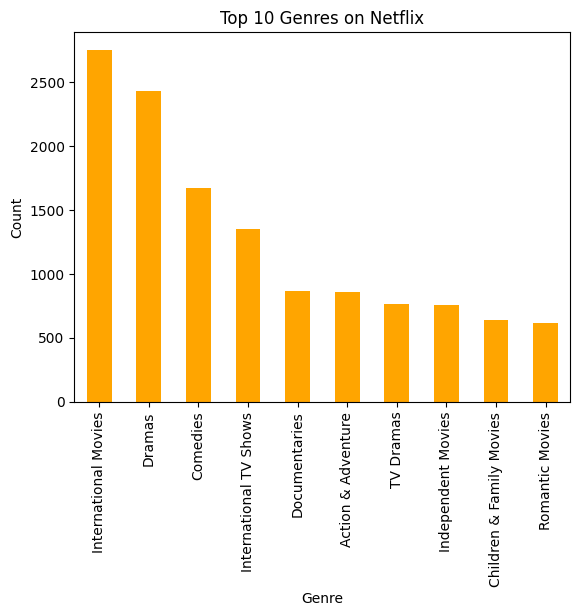

In [ ]:
# Visualization 4: Top 10 most popular genres on Netflix
genre_count = df['listed_in'].str.split(', ').explode().value_counts().head(10)

genre_count.plot(kind='bar', color='orange')
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()

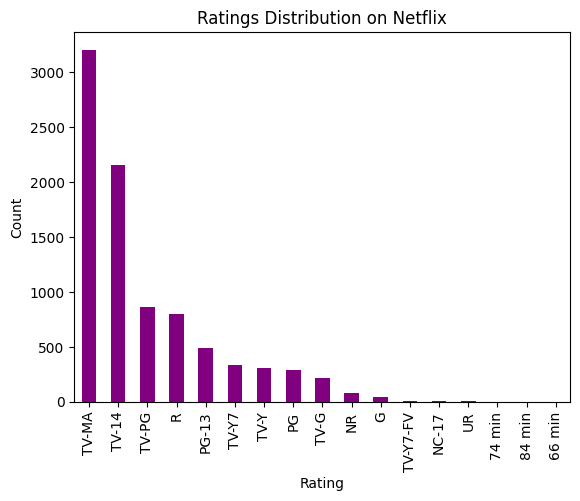

In [ ]:
# Visualization 5: Distribution of content ratings
rating_count = df['rating'].value_counts()

rating_count.plot(kind='bar', color='purple')
plt.title("Ratings Distribution on Netflix")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

In [ ]:
# Level 2: Prepare data for regression analysis to predict content duration
# Select relevant columns and remove missing values
reg_df = df[['duration', 'release_year', 'rating', 'type', 'listed_in']].dropna()

# Extract numeric duration values from duration column
reg_df['duration_num'] = reg_df['duration'].str.extract('(\d+)').astype(int)

# Encode categorical variable (type) to numeric
reg_df['type'] = reg_df['type'].map({'Movie': 0, 'TV Show': 1})

# One-hot encode rating categories for model input
reg_df = pd.get_dummies(reg_df, columns=['rating'], drop_first=True)

# Display prepared data
reg_df.head()

In [ ]:
# Prepare features and target for regression model
X = reg_df.drop(['duration', 'duration_num', 'listed_in'], axis=1)
y = reg_df['duration_num']

# Split data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Build and train linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions and evaluate model performance
y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
mse, r2